In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv("/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv", parse_dates=['Date'])

In [70]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [7]:
df.shape

(2956, 7)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [102]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year'], dtype='object')

In [44]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [71]:
data['Date'] = pd.to_datetime(data['Date'])

In [72]:
data['Year'] = data['Date'].dt.year

In [73]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,2010
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,2010
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2010
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,2010


In [75]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year'], dtype='object')

# Trading Volume per Year

In [74]:
volume = data[['Year', 'Volume']].groupby('Year').agg({
    'Volume': ['sum']}).reset_index()

In [108]:
volume

,Year,Total Volume
0,2010,1026845500
1,2011,1626175500
2,2012,1537245000
3,2013,10593729500
4,2014,8711606500
5,2015,5441089000
6,2016,5811808500
7,2017,7950157000
8,2018,10808194000
9,2019,11540242000


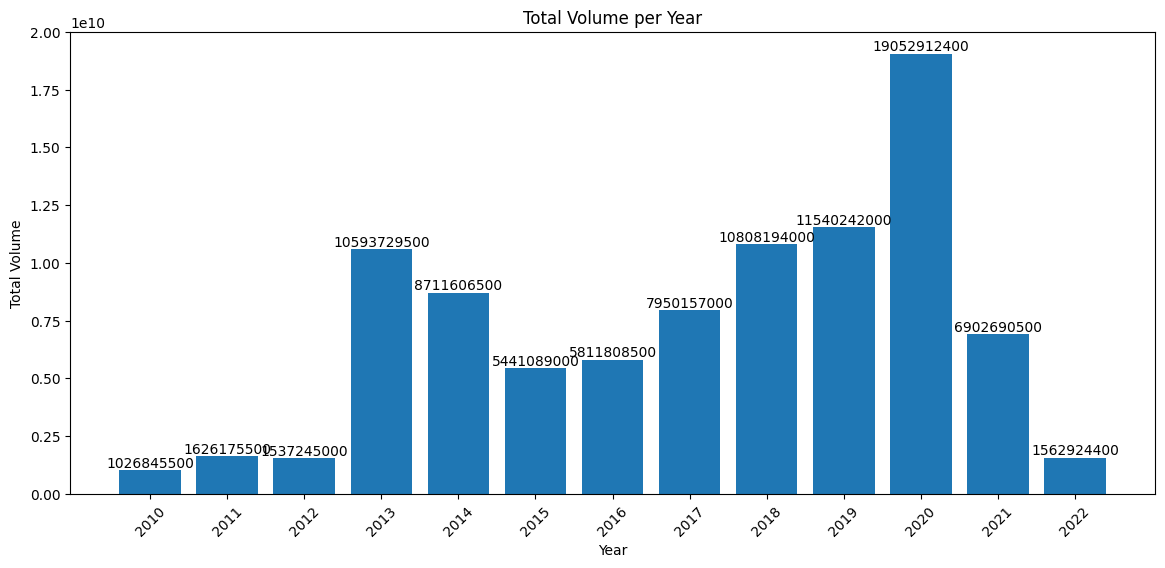

In [143]:
xtick = volume['Year']
plt.figure(figsize=(14, 6))
plt.bar(volume['Year'], volume['Total Volume'])

for i in range(len(volume)):
    plt.text(volume['Year'][i], volume['Total Volume'][i] + 0.1, f"{round(volume['Total Volume'][i])}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Year')
plt.xticks(xtick, rotation=45)
plt.ylabel('Total Volume')
plt.title('Total Volume per Year')
plt.show()

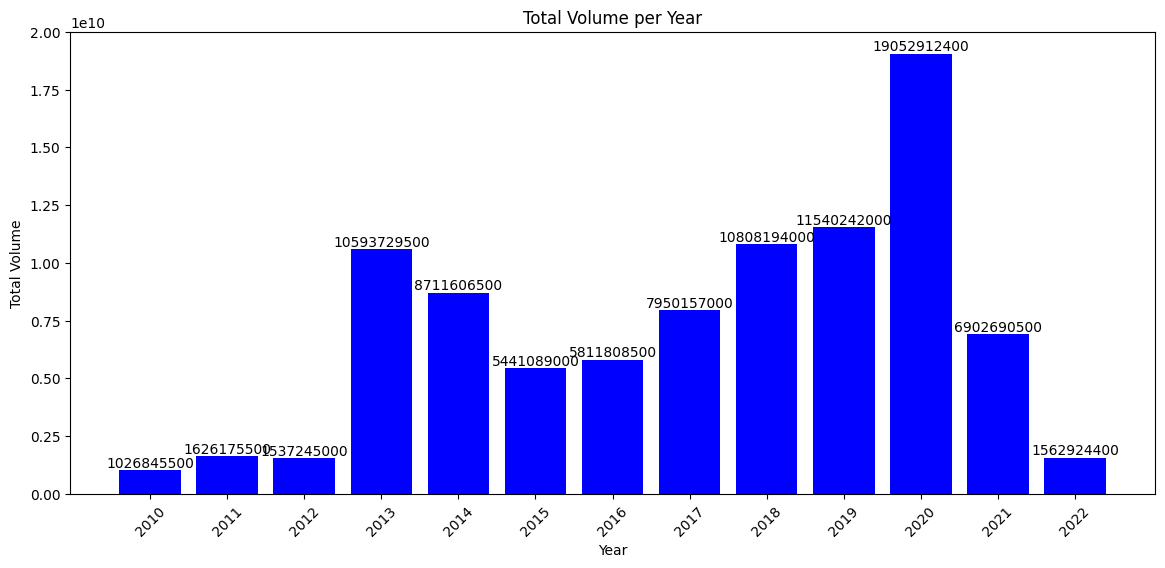

In [140]:
xtick = volume['Year']
plt.figure(figsize=(14, 6))
plt.bar(volume['Year'], volume['Total Volume'], color='blue')
for i in range(len(volume)):
    plt.text(volume['Year'][i], volume['Total Volume'][i] + 0.1, f"{round(volume['Total Volume'][i])}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Year')
plt.xticks(xtick, rotation=45)
plt.ylabel('Total Volume')
plt.title('Total Volume per Year')
plt.show()

# The Opening Price of the Stock per Year

In [80]:
opening = data[['Year', 'Open']].groupby('Year').agg({
    'Total Opening': ['sum']}).reset_index()

In [107]:
opening

,Year,Total Opening
0,2010,608.608000
1,2011,1351.828000
2,2012,1560.156000
3,2013,5262.587992
4,2014,11260.135974
5,2015,11583.530034
6,2016,10586.945990
7,2017,15777.669988
8,2018,15922.610065
9,2019,13760.617976


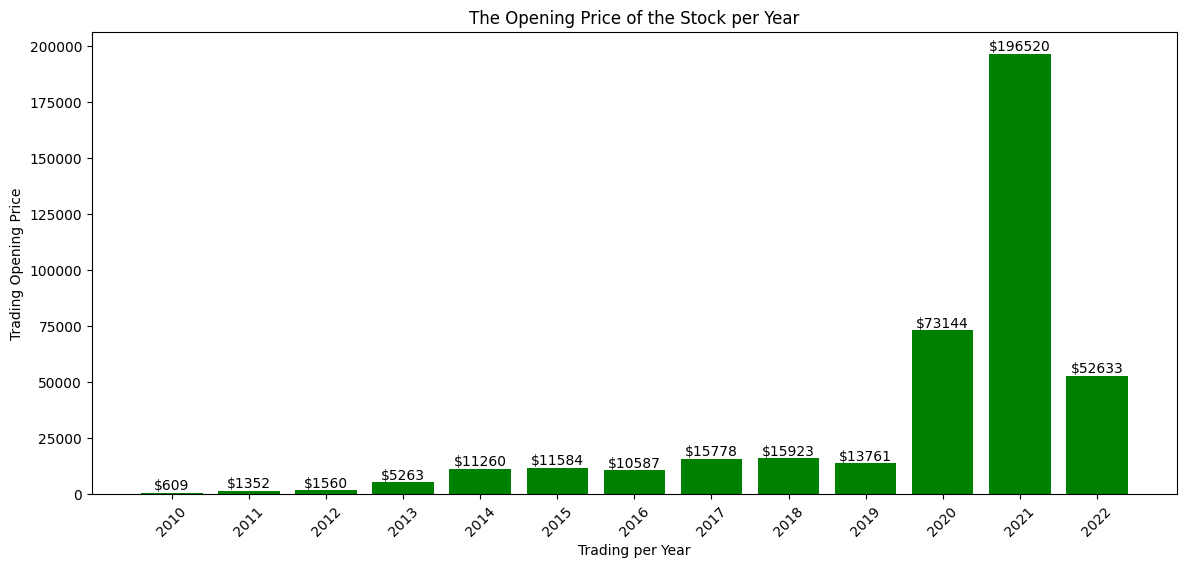

In [138]:
xtick = opening['Year']
plt.figure(figsize=(14, 6))
plt.bar(opening['Year'], opening['Total Opening'], color='green')
for i in range(len(opening)):
    plt.text(opening['Year'][i], opening['Total Opening'][i] + 0.1, f"${round(opening['Total Opening'][i])}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Trading per Year')
plt.xticks(xtick, rotation=45)
plt.ylabel('Trading Opening Price')
plt.title('The Opening Price of the Stock per Year')
plt.show()

# The Closing Price of the Stock per Year

In [104]:
closing = data.groupby('Year')['Close'].sum().reset_index()

In [105]:
closing

,Year,Close
0,2010,606.888000
1,2011,1350.960000
2,2012,1558.430000
3,2013,5261.822003
4,2014,11255.785988
5,2015,11594.162038
6,2016,10572.270021
7,2017,15778.678005
8,2018,15928.957984
9,2019,13785.922006


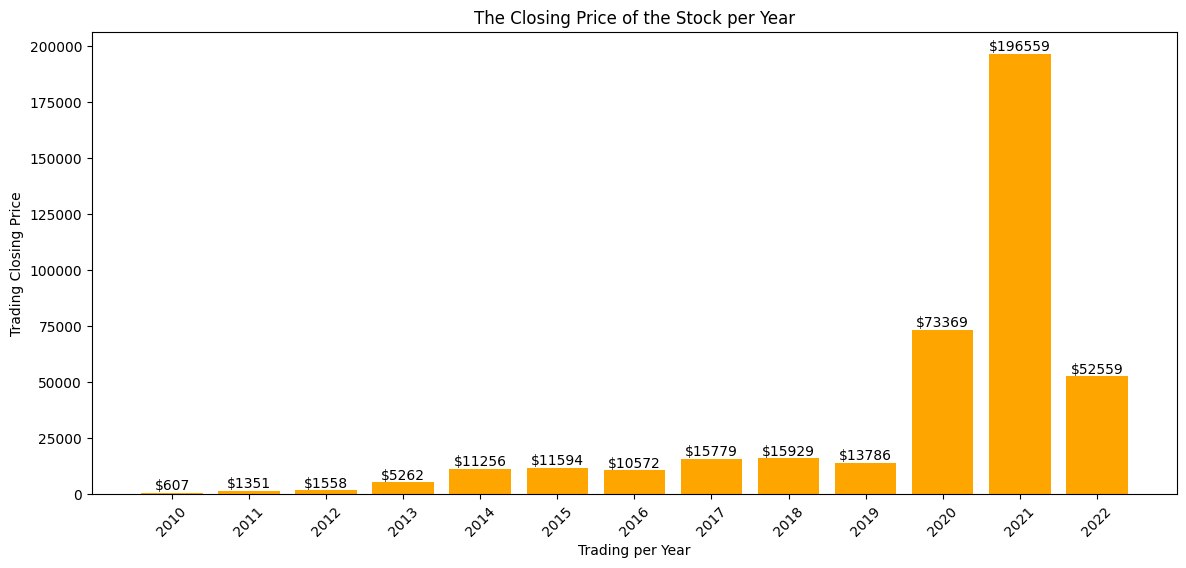

In [136]:
xtick = closing['Year']
plt.figure(figsize=(14, 6))
plt.bar(closing['Year'], closing['Close'], color='orange')
for i in range(len(closing)):
    plt.text(closing['Year'][i], closing['Close'][i] + 0.1, f"${round(closing['Close'][i])}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Trading per Year')
plt.xticks(xtick, rotation=45)
plt.ylabel('Trading Closing Price')
plt.title('The Closing Price of the Stock per Year')
plt.show()

# The Highest Price of the Stock per Year

In [114]:
highest = data.groupby('Year')['High'].sum().reset_index()

In [115]:
highest

,Year,High
0,2010,626.008000
1,2011,1379.964000
2,2012,1590.458000
3,2013,5385.392005
4,2014,11463.474024
5,2015,11762.436003
6,2016,10757.048024
7,2017,15986.219974
8,2018,16249.419975
9,2019,13993.550017


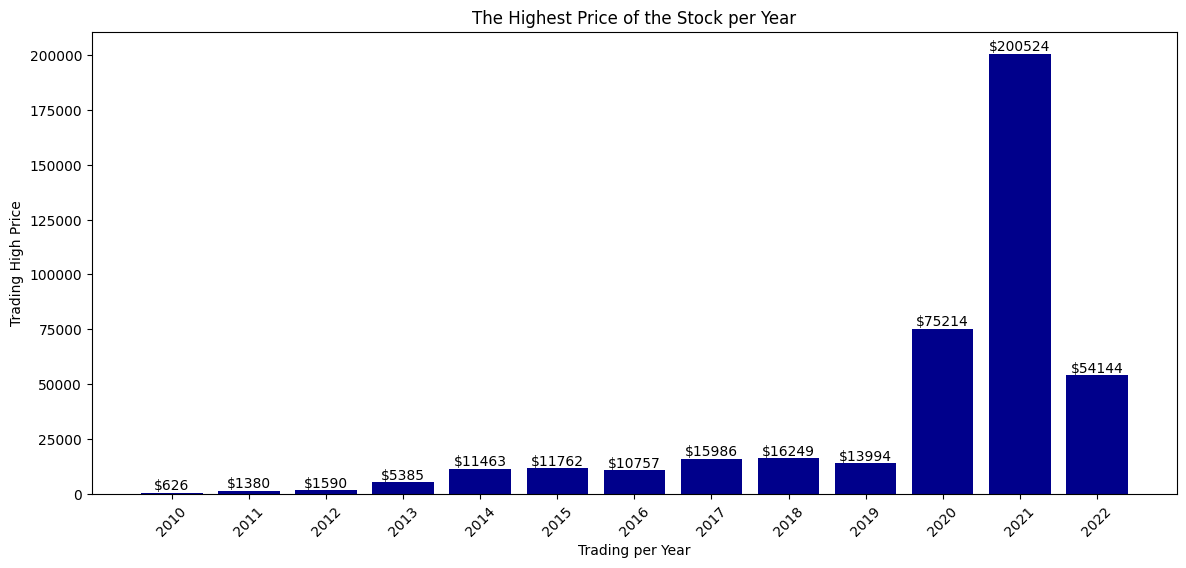

In [132]:
xtick = highest['Year']
plt.figure(figsize=(14, 6))
plt.bar(highest['Year'], highest['High'], color='darkblue')
for i in range(len(highest)):
    plt.text(highest['Year'][i], highest['High'][i] + 0.1, f"${round(highest['High'][i])}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Trading per Year')
plt.xticks(xtick, rotation=45)
plt.ylabel('Trading High Price')
plt.title('The Highest Price of the Stock per Year')
plt.show()

# The Lowest Price of the Stock per Year

In [118]:
lowest = data.groupby('Year')['Low'].sum().reset_index()

In [119]:
lowest

,Year,Low
0,2010,588.798000
1,2011,1320.186000
2,2012,1527.294000
3,2013,5129.706001
4,2014,11047.988031
5,2015,11404.040014
6,2016,10396.821988
7,2017,15546.285994
8,2018,15589.725993
9,2019,13538.071990


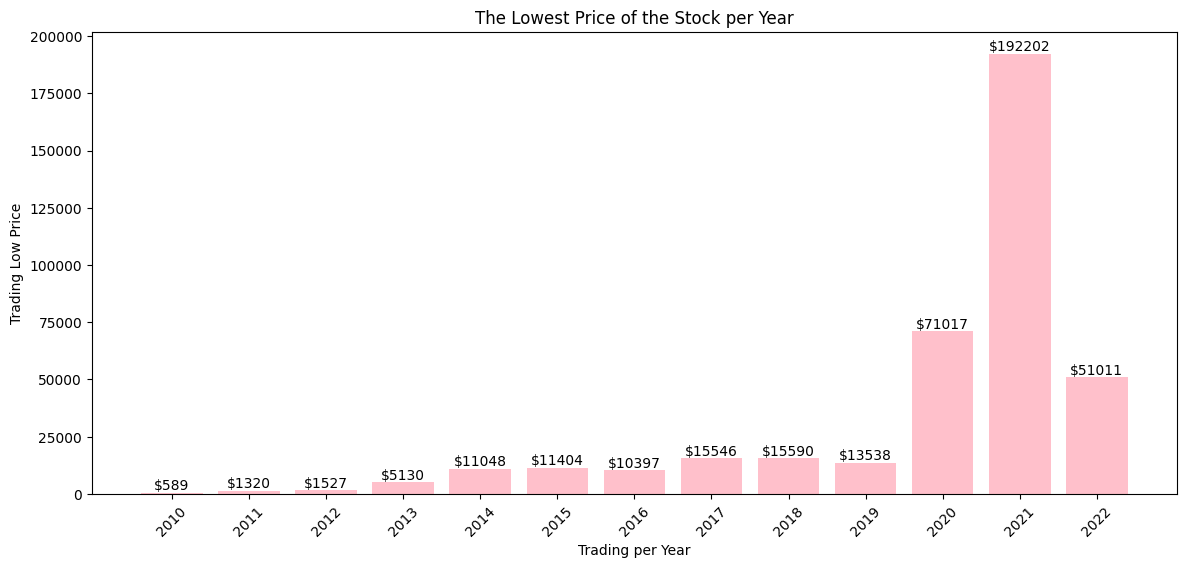

In [128]:
xtick = lowest['Year']
plt.figure(figsize=(14, 6))
plt.bar(lowest['Year'], lowest['Low'], color='pink')
for i in range(len(lowest)):
    plt.text(lowest['Year'][i], lowest['Low'][i] + 0.1, f"${round(lowest['Low'][i])}", 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Trading per Year')
plt.xticks(xtick, rotation=45)
plt.ylabel('Trading Low Price')
plt.title('The Lowest Price of the Stock per Year')
plt.show()

# Stock Price Over Time

Objective: Visualize the historical closing price to understand the overall trend.

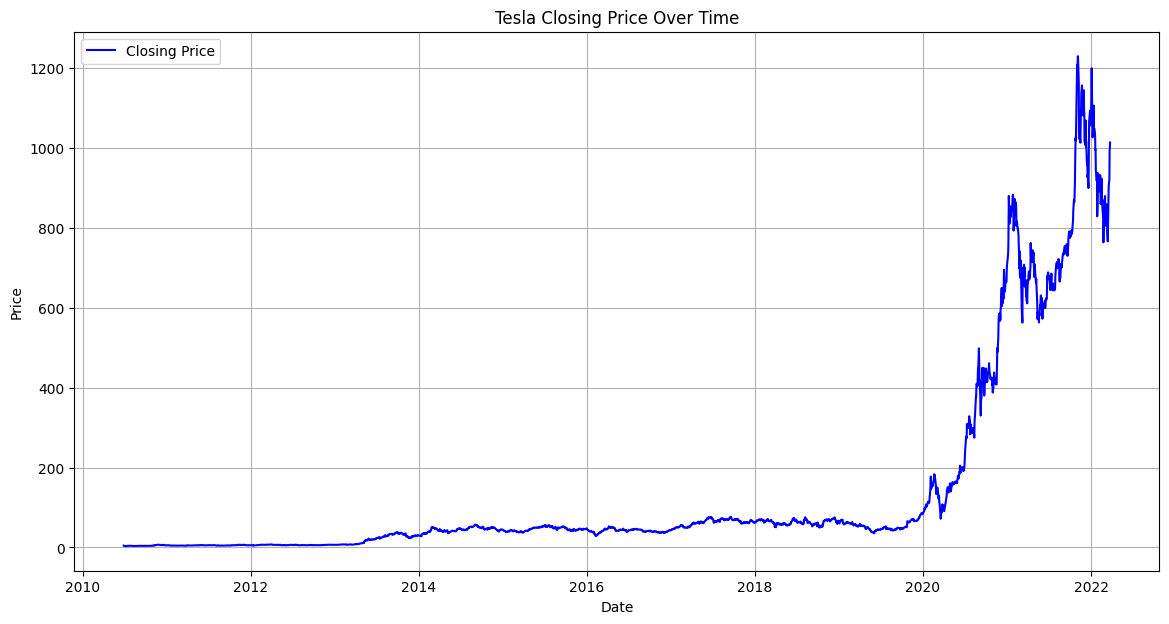

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 2. Volume Traded
Understand how much stock is being traded over time.

Objective: High trading volumes can indicate strong investor interest and might precede significant price movements.

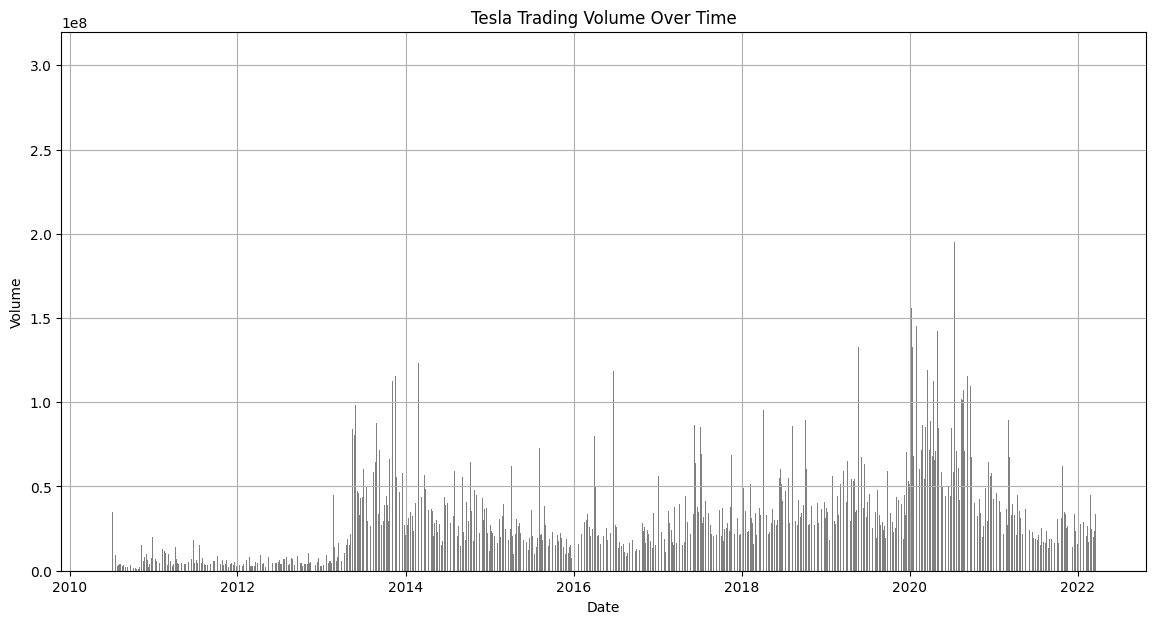

In [24]:
plt.figure(figsize=(14, 7))
plt.bar(data.index, data['Volume'], color='gray')
plt.title('Tesla Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# 3. Volatility Analysis

Calculate and plot rolling volatility to understand fluctuations.

Objective: Measures the standard deviation of daily returns over a specified period. Helps in understanding how much the stock’s price fluctuates over time.

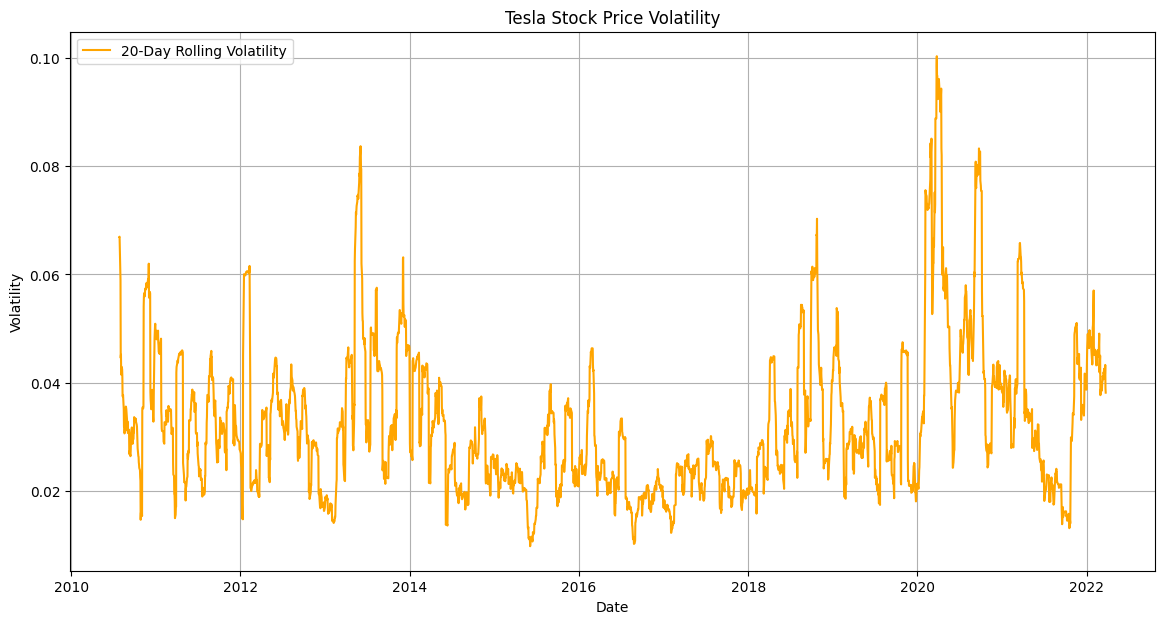

In [25]:
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volatility'], label='20-Day Rolling Volatility', color='orange')
plt.title('Tesla Stock Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


# 4. Candlestick Chart

Objective: Provides a detailed view of price movements within each day, useful for technical analysis and identifying specific price patterns.

In [26]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(title='Tesla Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)
fig.show()


In [36]:
# Filter the dataset to include only data from 2022 onwards
data2022plus = data.loc['2022-01-01':]

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data2022plus.index,
                                     open=data2022plus['Open'],
                                     high=data2022plus['High'],
                                     low=data2022plus['Low'],
                                     close=data2022plus['Close'])])

fig.update_layout(title='Tesla Candlestick Chart (2022 Onwards)',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)  # Optional: Hide the range slider
fig.show()